In [1]:
# Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [2]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving cleaned_housing_data.csv to cleaned_housing_data.csv


In [3]:
# Shape and first 5 rows
print(f"Shape: {df.shape}")
print(df.head())

# Data types
print("\n Data Types ")
print(df.dtypes)

# Missing values
print("\n Missing Values")
print(df.isnull().sum())

# Descriptive statistics
print("\n Descriptive Statistics ")
print(df.describe(include='all'))

Shape: (541, 15)
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  price_per_sqft  bed_bath_ratio  
0                 2     1792.452830             2.0  
1                 2     1367.1875

In [4]:
# Convert binary features to categorical
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[binary_cols] = df[binary_cols].replace({0:'No',1:'Yes'})

In [5]:
furnishing_map = {0:'Unfurnished', 1:'Semi-Furnished', 2:'Furnished'}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_map)


In [6]:
#  Descriptive Statistics
print("\n Numerical Features ")
display(df.describe())

print("\n Categorical Features ")
print(df[binary_cols + ['furnishingstatus']].apply(pd.Series.value_counts))



 Numerical Features 


,price,area,bedrooms,bathrooms,stories,parking,price_per_sqft,bed_bath_ratio
count,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,4.754513e+06,5115.240296,2.950092,1.282810,1.805915,0.693161,994.397089,2.493530
std,1.860619e+06,2075.826949,0.711874,0.497643,0.869888,0.861808,345.981486,0.783057
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,270.395550,1.000000
25%,3.430000e+06,3584.000000,2.000000,1.000000,1.000000,0.000000,745.370370,2.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,952.380952,2.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1184.615385,3.000000
max,1.330000e+07,13200.000000,5.000000,4.000000,4.000000,3.000000,2640.000000,5.000000



 Categorical Features 
                mainroad  guestroom  basement  hotwaterheating  \
Furnished            NaN        NaN       NaN              NaN   
No                  77.0      444.0     350.0            516.0   
Semi-Furnished       NaN        NaN       NaN              NaN   
Unfurnished          NaN        NaN       NaN              NaN   
Yes                464.0       97.0     191.0             25.0   

                airconditioning  prefarea  furnishingstatus  
Furnished                   NaN       NaN             139.0  
No                        370.0     413.0               NaN  
Semi-Furnished              NaN       NaN             226.0  
Unfurnished                 NaN       NaN             176.0  
Yes                       171.0     128.0               NaN  


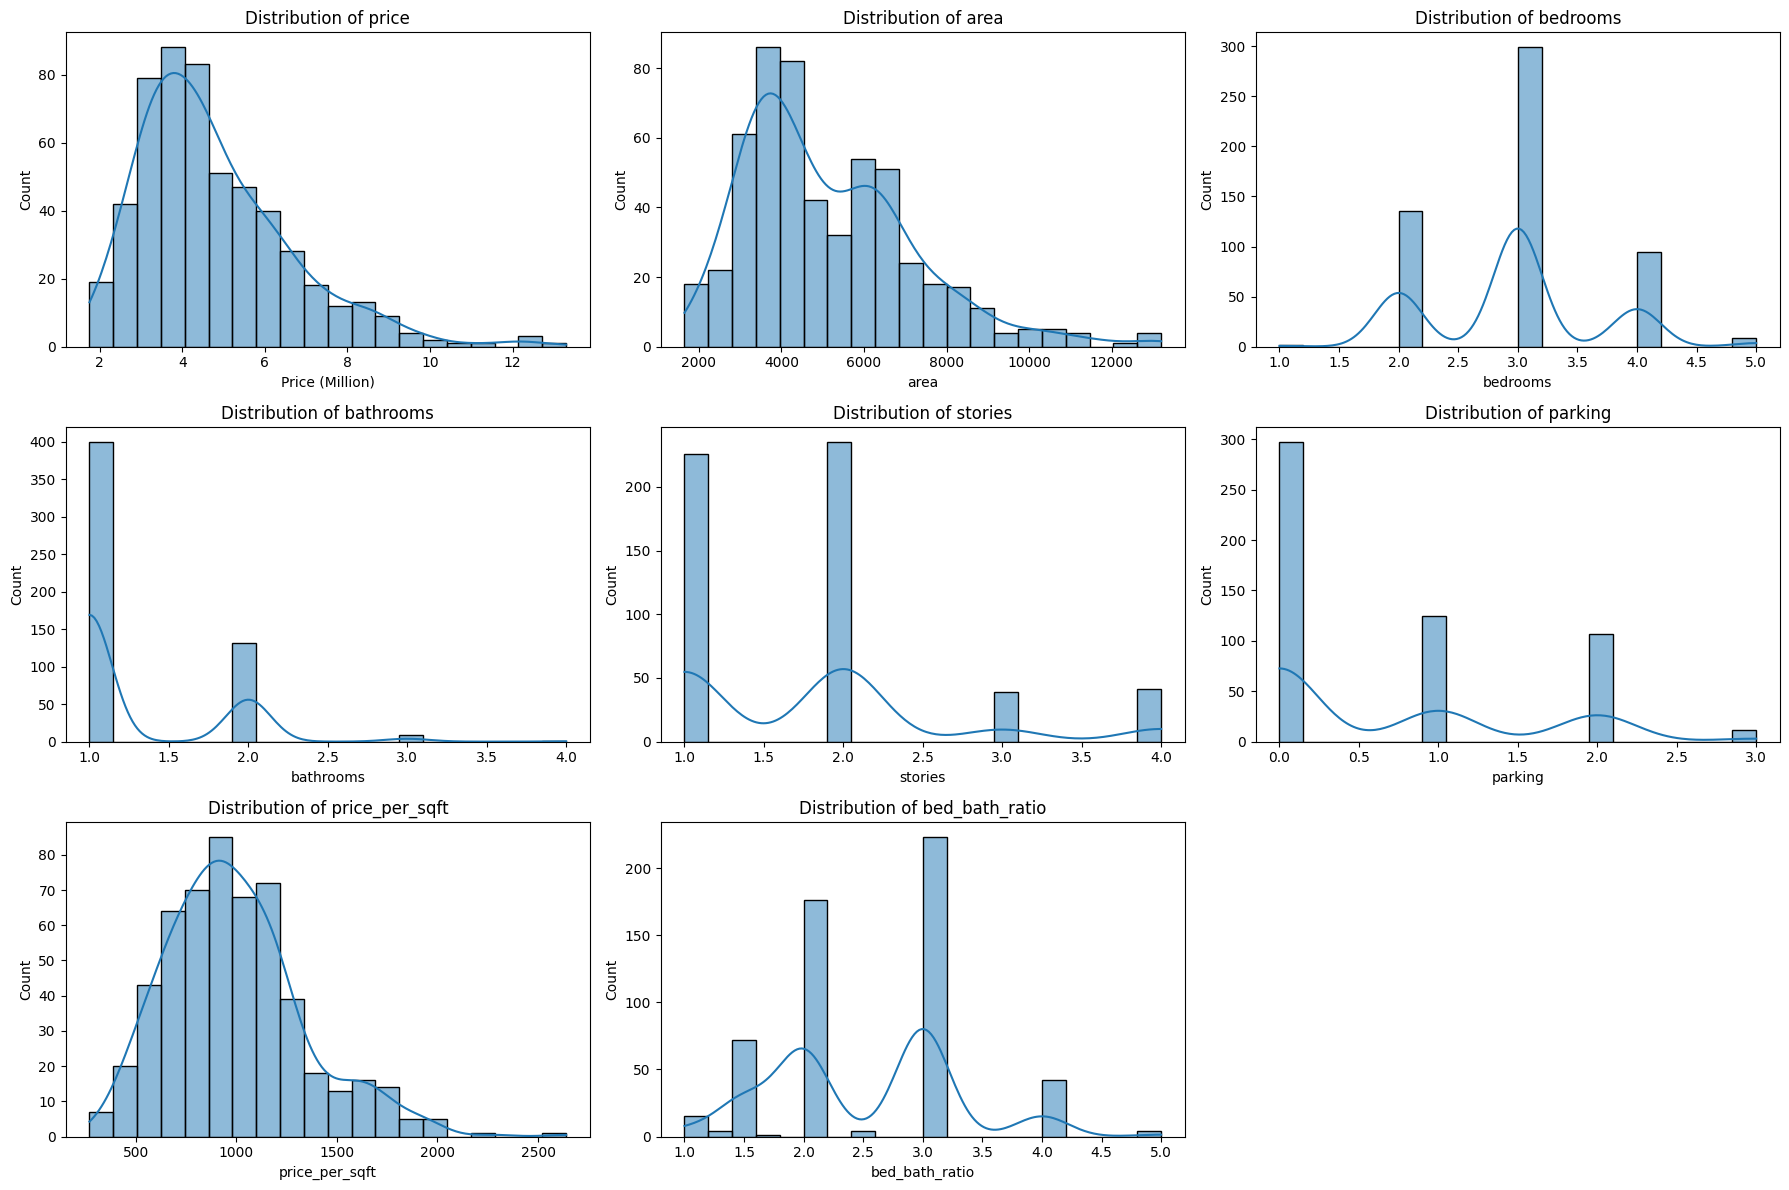

In [7]:
plt.figure(figsize=(18,12))

# Numerical features
num_cols = ['price','area','bedrooms','bathrooms','stories','parking','price_per_sqft','bed_bath_ratio']
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    if col == 'price':
        sns.histplot(df[col]/1e6, bins=20, kde=True) # Display in millions
        plt.xlabel('Price (Million)')
    else:
        sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

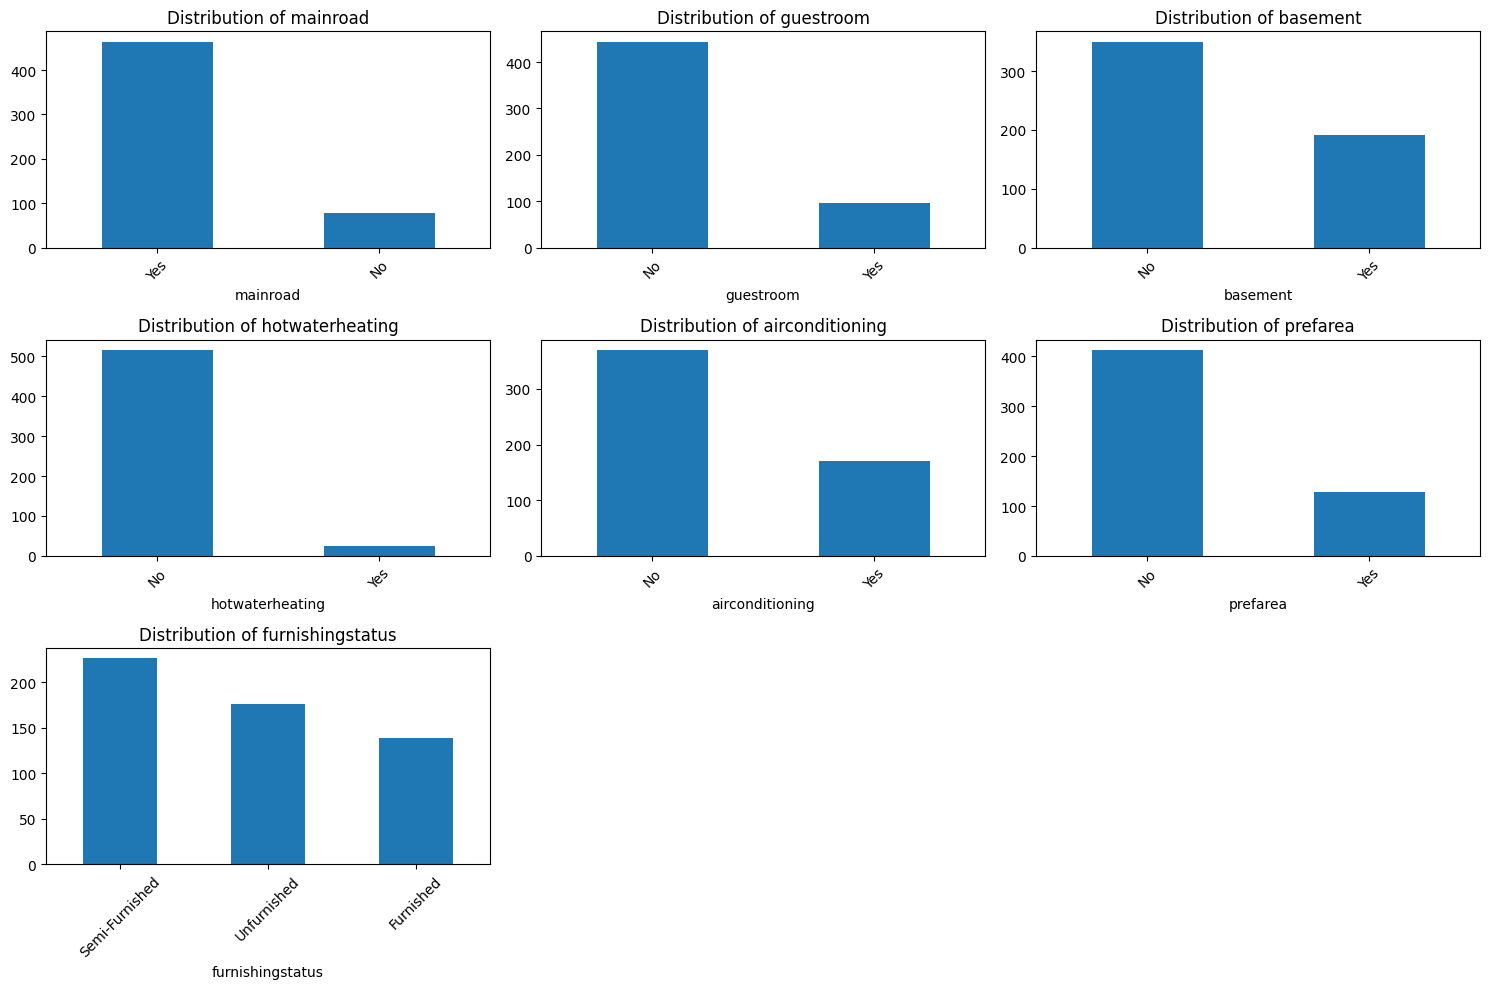

In [8]:
# Categorical features
plt.figure(figsize=(15,10))
for i, col in enumerate(binary_cols + ['furnishingstatus'], 1):
    plt.subplot(3,3,i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

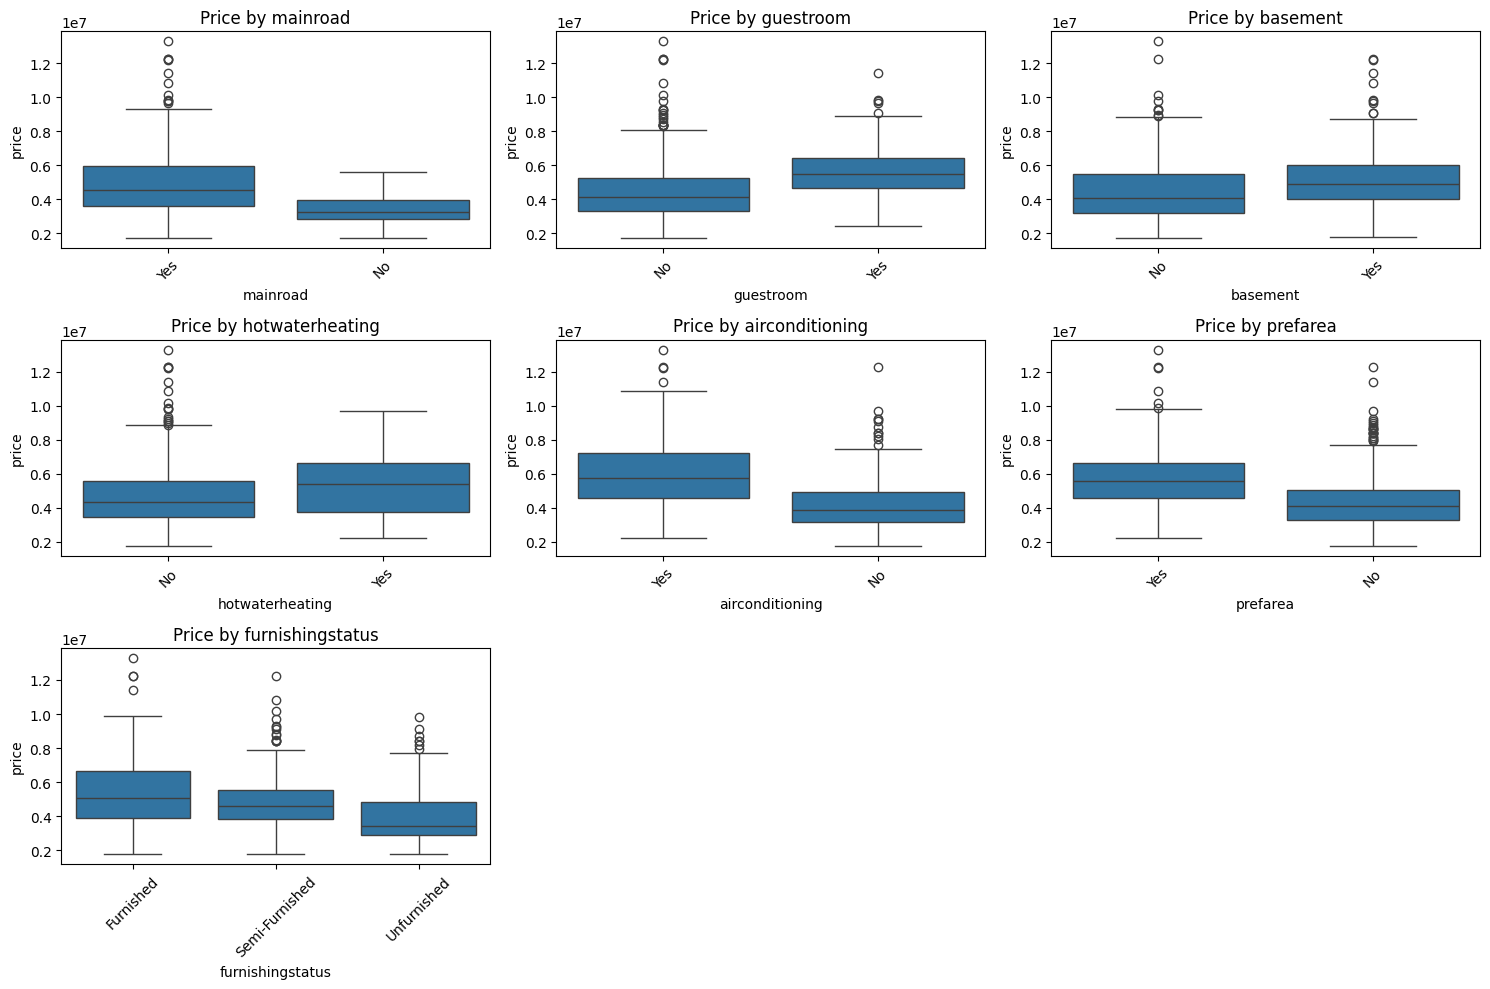

In [9]:
# Price vs Categorical Features
plt.figure(figsize=(15,10))
for i, col in enumerate(binary_cols + ['furnishingstatus'], 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

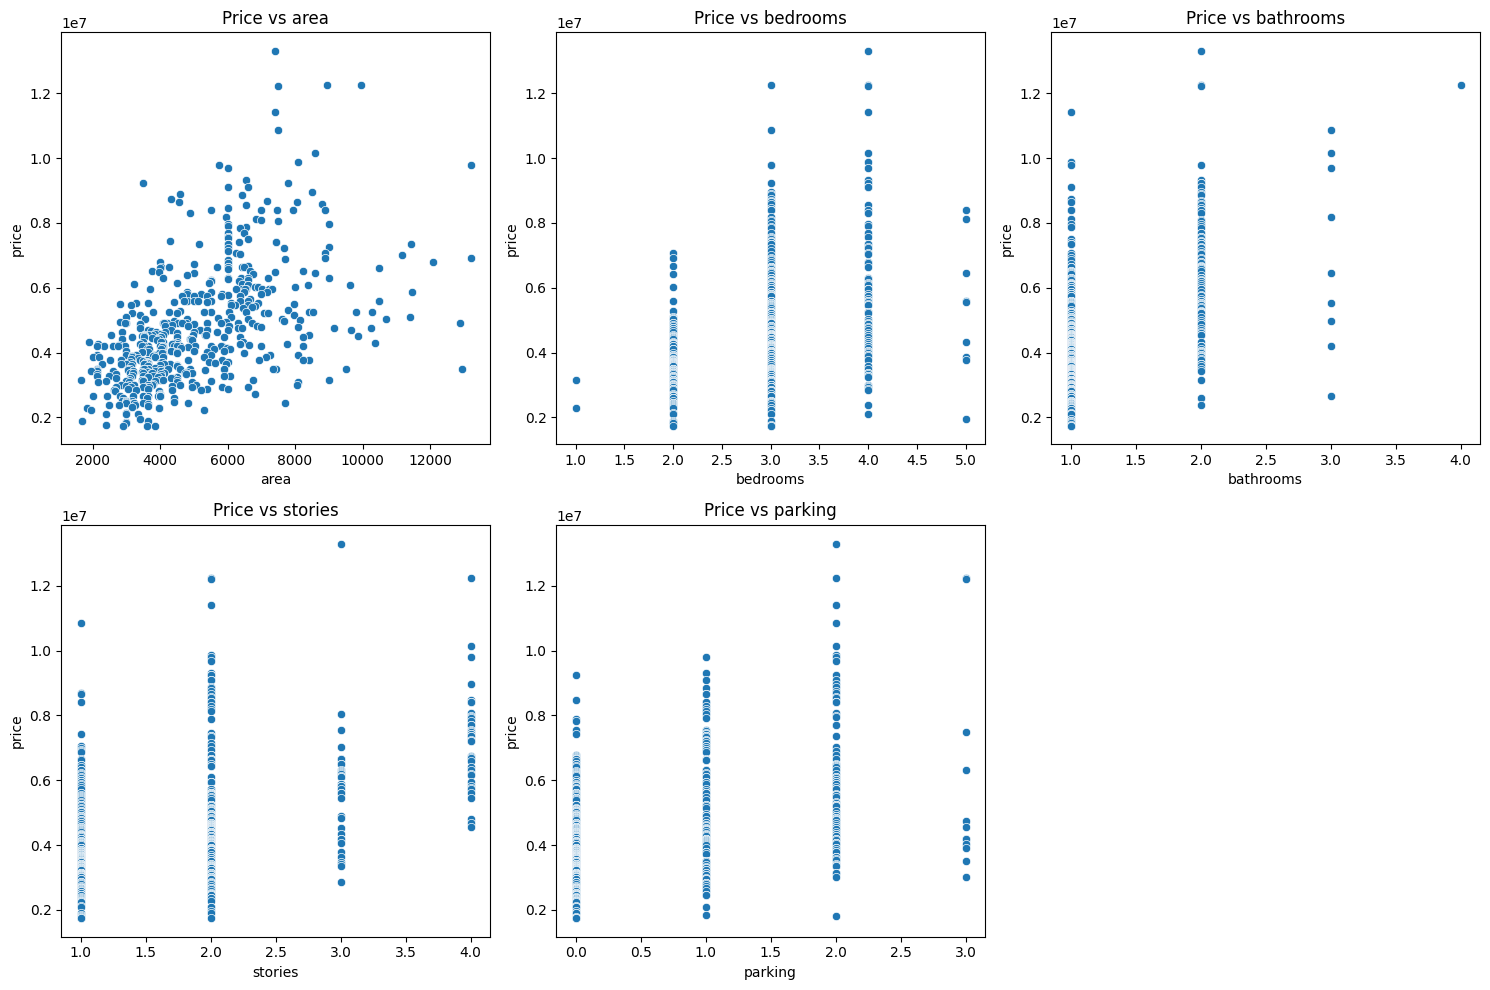

In [10]:
# Price vs Numerical Features
plt.figure(figsize=(15,10))
for i, col in enumerate(['area','bedrooms','bathrooms','stories','parking'], 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

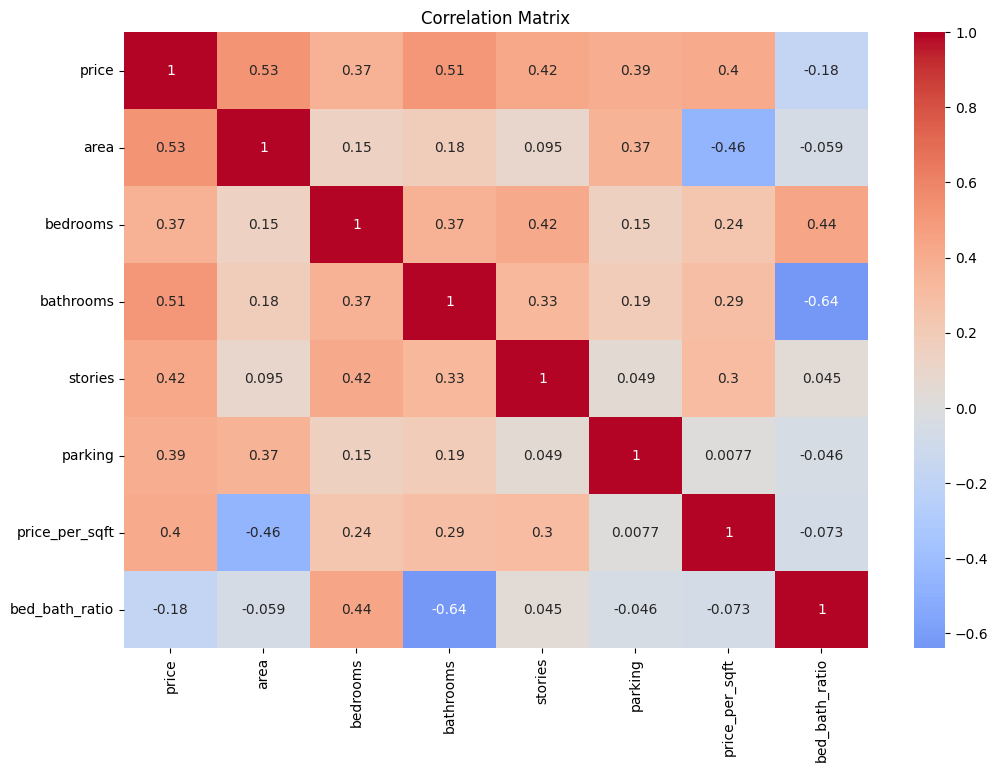

In [11]:
# Numerical correlation
plt.figure(figsize=(12,8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Save Processed Data ---
df.to_csv('cleaned_real_estate.csv', index=False)
files.download('cleaned_real_estate.csv')